# How

- I joined a free class in [GSX](https://www.genshuixue.com/) and the class started from May 16th - May 18th.
- I followed the Appendex I from [Muddy Water Reserach Report](https://www.muddywatersresearch.com/research/gsx/mw-is-short-gsx/) and download message log file.
- I unzipped it into `all.json`.

In [68]:
DATA_ROOT_PATH = '/src/data/gsx/6004241052268030'
FILENAME = 'all.json'

In [69]:
import numpy as np
import math
import os.path
import json

In [70]:
with open(os.path.join(DATA_ROOT_PATH, FILENAME)) as jsonFile:
    msgLog = json.load(jsonFile)

In [71]:
# extract id and joinTime from the 'from' field
loginDict = dict()
for item in msgLog:
    userInfo = item.get('from')
    if userInfo is not None and userInfo.get('joinTime') is not None:
        loginDict[userInfo.get('id')] = userInfo.get('joinTime')

In [72]:
# The dictioanry with user ID as key and joinTime as value.
print(loginDict)

{'182027187': 1589625700, '182027913': 1589626021, '182028054': 1589626056, '182029353': 1589626431, '182029662': 1589626504, '182030553': 1589626684, '182030619': 1589626696, '182030541': 1589626680, '182030454': 1589626667, '182029953': 1589626574, '182029749': 1589626530, '182029467': 1589626467, '182032290': 1589626908, '182032407': 1589626919, '182033622': 1589627085, '182033970': 1589627129, '182034207': 1589627171, '182034030': 1589627141, '182033931': 1589627124, '182035032': 1589627269, '182031627': 1589626832, '182035122': 1589627288, '182033100': 1589627016, '182036190': 1589627407, '182036103': 1589627394, '182037522': 1589627580, '182037819': 1589627618, '182037726': 1589627603, '182033748': 1589627105, '182036742': 1589627478, '182037378': 1589627563, '182034306': 1589627181, '182029566': 1589626493, '182038608': 1589627701, '182037243': 1589627548, '182036523': 1589627454, '182038527': 1589627699, '182029332': 1589626421, '182039337': 1589627776, '182039448': 1589627785,

In [73]:
print(len(loginDict))

329


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

x = loginDict.keys()
y = loginDict.values()
y_np = np.array(list(y), dtype=np.int32)
from scipy import stats
stats.describe(y_np)


DescribeResult(nobs=329, minmax=(1589625700, 1589640926), mean=1589631112.3647416, variance=11536457.311679889, skewness=0.8308323177470095, kurtosis=-0.1274033207655778)

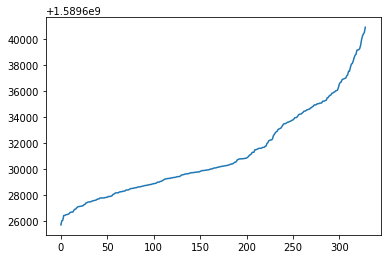

In [75]:
y_np_sorted = np.sort(y_np)
plt.plot(y_np_sorted)

## Find the Precise Joiner

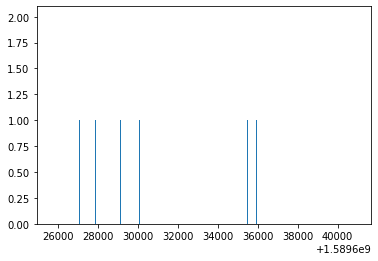

In [92]:
# I bucketed loginTime by 329 bins. It is more than enough.
n, bins, patches = plt.hist(y_np_sorted, range(1589625700,1589640926))

In [93]:
print(n)
print(bins)
print(patches)

[1. 0. 0. ... 0. 0. 0.]
[1589625700 1589625701 1589625702 ... 1589640923 1589640924 1589640925]
<a list of 15225 Patch objects>


In [94]:
n_indexes = list()

for index in range(len(n)):
    if n[index] > 1:
        n_indexes.append(index)
print(n_indexes)

[2076, 2928, 3624, 4061, 4079, 5130, 6548]


In [95]:
len(n_indexes)

7

In [96]:
duplicate_logintime = np.asarray(bins[n_indexes])

In [97]:
duplicate_logintime_ids = list()
for logintime in duplicate_logintime:
    for k, v in loginDict.items():
        if v == logintime:
            duplicate_logintime_ids.append(k)

In [105]:
print(duplicate_logintime)
print(len(duplicate_logintime))

[1589627776 1589628628 1589629324 1589629761 1589629779 1589630830
 1589632248]
7


In [106]:
print(duplicate_logintime_ids)
print(len(duplicate_logintime_ids))

['182039337', '182039358', '182049108', '182049132', '182057118', '182057127', '182063094', '182063082', '182063271', '182063346', '182076078', '182076108', '182089374', '182089386']
14


In [102]:
# the odd that they login at the same time
1/abs(1589640926-1589625700)

6.567713122290818e-05